In [1]:
import numpy as np
import pandas as pd

import re

data = pd.read_csv('/kaggle/input/ys19-2023-assignment-2/train_set.csv')

pd.set_option('max_colwidth', None)
data.head()

print(data['Text'])

0                                     #απολυμανση_κοριοι #απεντομωση_κοριος #απολυμανσεις #κοριος#Alphatv #Την Κυριακη  #Κουλης #Τσιπρα #F-35 Κοριοί απολύμανση - Καταπολέμηση κοριών - Απεντόμωση για κοριούς https://t.co/Wly4WIUAxT
1                                                                                                                 Έξι νέες επιστολές για τη Μακεδονία «καίνε» τη ΝΔ - Ο Μητσοτάκης γνώριζε και δίχασε το έθνος https://t.co/g4alBWyKdW
2                                                                                                                                                                  Ισχυρό ΚΚΕ, δύναμη του λαού στη Βουλή και στους καθημερινούς αγώνες
3                                                                                                              @five2nds @anthi7vas Μνημονιακότατο το #ΜεΡΑ25  #Εκλογες_2019 #8iouliou #epomeni_mera #ΤΩΡΑ_ΚΚΕ https://t.co/Mw69TIaHLZ
4                                                                           

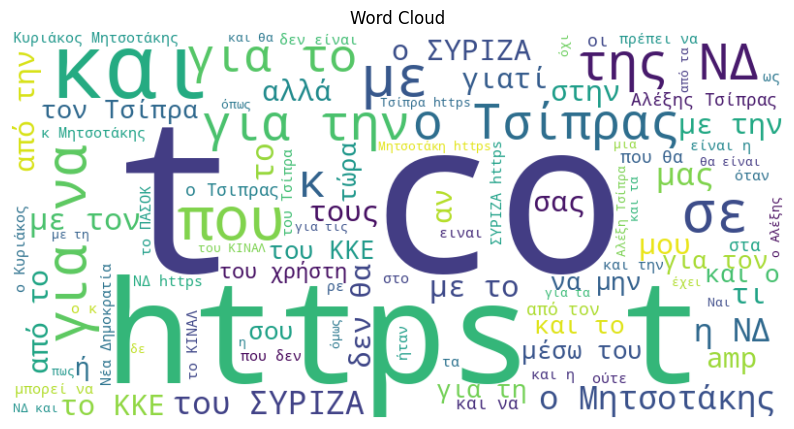

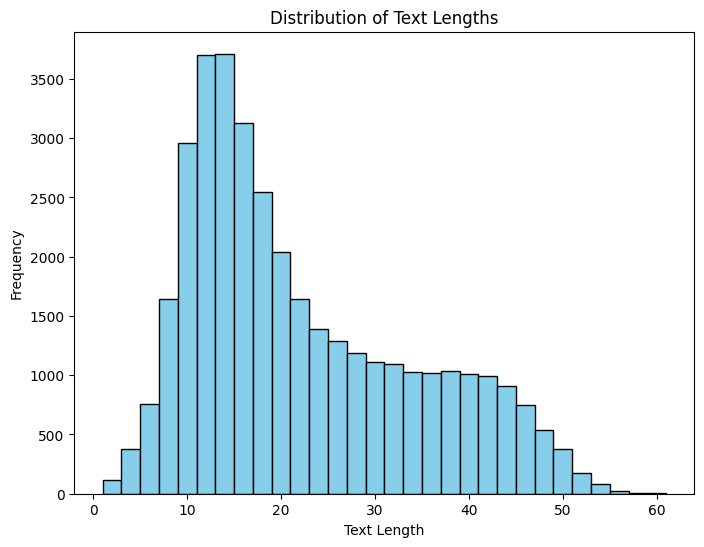

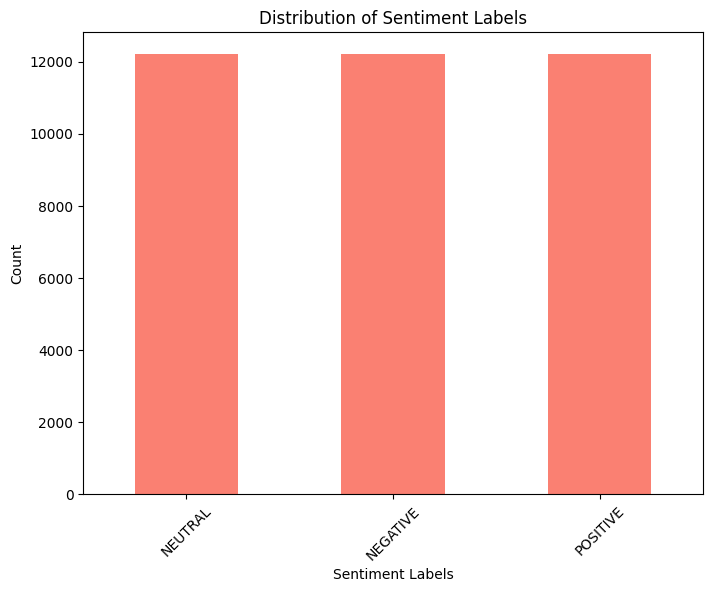

In [2]:
##################### DATA ANALYSIS #######################


###################### Word Cloud #########################
from wordcloud import WordCloud
import matplotlib.pyplot as plt

combined_text = ' '.join(data['Text'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(combined_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show() 

################ TEXT LENGTH HISTOGRAM ################

text_lengths = data['Text'].apply(lambda x: len(x.split())) 

plt.figure(figsize=(8, 6))
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()


######### BAR CHART FOR SENTIMENT #####################
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='salmon')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=45)
plt.show()

In [3]:
pip install greek-stemmer-pos

  Obtaining dependency information for pytest-cov from https://files.pythonhosted.org/packages/a7/4b/8b78d126e275efa2379b1c2e09dc52cf70df16fc3b90613ef82531499d73/pytest_cov-4.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for coverage[toml]>=5.2.1 from https://files.pythonhosted.org/packages/b3/91/1f1c7f3351e4c996558e67bfe4f04084b7d01878e2bb55640652e1ee908f/coverage-7.4.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 13.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
########## DATA CLEANING ##########3

##################  Libraries  #######################
import re

from unidecode import unidecode

import string
import unicodedata

import spacy

from greek_stemmer import stemmer

pd.set_option('max_colwidth', None)
data.head()

##################  Functions  #######################

#Removing mentions hashtags and links
def remove_mentions_hashtags_links(text):
    return ' '.join(word for word in text.split() if not (word.startswith('@') or word.startswith('#') or word.startswith('https://')))

#Converting capital to lower case letters
def clean_greek_text(text):
    cleaned_text = unidecode(text).lower()
    return cleaned_text

#Removing accends
def remove_accents(text):
    return ''.join(char for char in unicodedata.normalize('NFD', text) if not unicodedata.combining(char))

#Removing stop words
def remove_stopwords(text):
    stopwords = [
        'αλλά', 'αν', 'αντί', 'από', 'αυτά', 'αυτές', 'αυτή', 'αυτό', 'αυτοί', 'αυτός', 
        'αυτούς', 'αυτών', 'για', 'δεν', 'εάν', 'ένα', 'έναν', 'ένας', 'έναντι', 'ένεκα', 
        'έτσι', 'έχει', 'ή', 'ίσως', 'ακόμα', 'αλλά', 'αλλιώς', 'αν', 'αντί', 
        'από', 'αφού', 'αυτά', 'αυτές', 'αυτή', 'αυτό', 'αυτοί', 'αυτός', 'αυτού', 'αυτούς', 
        'αυτών', 'για', 'γιατί', 'γιατί', 'δε', 'δεν', 'δηλαδή', 'εάν', 'είμαι', 
        'είμαστε', 'είναι', 'είσαι', 'είστε', 'εκεί', 'εκτός', 'ένα', 'ένας','έτσι', 'έχει', 'έχεις', 'ή', 'ίσως', 'ήδη', 'ήμαρτον', 'ίσως', 'ίσως', 
        'ήταν', 'ίταν', 'ακόμα', 'ακριβώς', 'αλίμονο', 'αλλά', 'αλλιώς', 'αν', 'ανά', 
        'ανάμεσα', 'ανάμεσα', 'αναμεταξύ', 'αναμεταξύ', 'αντί', 'αντίθετα','από', 'απ', 'από', 'γι', 'για', 'δι', 'δια', 'εις', 'εκ', 'ένα', 'έναν', 'ένας', 'ενός', 
    'εξ', 'επ', 'επί', 'καθ', 'και', 'κατ', 'κατά', 'με', 'μέσα', 'μια', 'μία', 'μιά', 'με', 'ότι',
    'μιαν', 'μιας', 'περί', 'σε', 'στα', 'στη', 'στην', 'στις', 'στο', 'στον', 'στους', 'πιο', 'σου', 'ο', 'η',
    'τα', 'τη', 'την', 'της', 'τις', 'το', 'τον', 'του', 'τους', 'των', 'υπό']

    words = text.split()
    
    cleaned_words = [word for word in words if word not in stopwords]
    cleaned_text = ' '.join(cleaned_words)
    
    return cleaned_text

#Removing punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    cleaned_text = text.translate(translator)
    return cleaned_text


#Stemming

def stemming(text):
    words = text.split()
    st_words = [stemmer.stem_word(word,"VBG") for word in words]
    st_text = ' '.join(st_words)
    return st_text
####################  Applications  #######################


data['Text'] = data['Text'].apply(remove_mentions_hashtags_links)
data['Text'] = data['Text'].apply(remove_stopwords)
data['Text'] = data['Text'].apply(remove_accents)
data['Text'] = data['Text'].apply(remove_punctuation)
data['Text'] = data['Text'].apply(stemming)
data['Text'] = data['Text'].str.lower()

print(data['Text'])

0                                                                                               κυριακ κορι απολυμανς καταπολεμης κορι απεντομως κορι
1                                                                                       εξι νε επιστολ μακεδονι «καινε» νδ  μητσοτακ γνωριζ διχας εθν
2                                                                                                              ισχυρ κκε δυναμ λα βουλ καθημεριν αγων
3                                                                                                                                           μνημονιακ
4                                                                                                               αυτ που συγκλονιστικ ψυχασθενει τσιπρ
                                                                             ...                                                                     
36625     κουλ μητσοτακ λε ψεματαδ αδειας κανεν μπαμπ παπαδημητριου μπαμπ προετοιμαζ που ερχετα κουλ

In [5]:
import gensim
import torch

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

############### Experiment ############### merging the two column (Text and Party) into one
#data['New_Text'] = data['Text'] + data['Party']
#data.drop(['Text', 'Party'], axis=1, inplace=True)



#tokenizing text data
tokenized_text = [word_tokenize(sentence.lower()) for sentence in data['Text']]

#converting tokenized text to a format suitable for tfidf-vectorizer
preprocessed_text = [" ".join(tokens) for tokens in tokenized_text]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text) # Got better result with tfidf

################# Experiment ################ testing who vectorizer is better
#count_vectorizer = CountVectorizer()
#count_matrix = count_vectorizer.fit_transform(preprocessed_text)


# converting tfidf matrix to tokenized text for word2vec training
inverse = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}
tfidf_text = [
    " ".join([inverse[word_id] for word_id in doc.indices]) 
    for doc in tfidf_matrix
]

word2vec_model = Word2Vec(sentences=tfidf_text, vector_size=100, window=5, min_count=1, workers=4)


#getting word2v2ec embeddings for words
word_embeddings = {}
for word in word2vec_model.wv.index_to_key:
    word_embeddings[word] = torch.tensor(word2vec_model.wv[word], dtype=torch.float32)



In [6]:
import torch
from sklearn.model_selection import train_test_split

#text to word embeddings
X = []  #in this list I store embeddings for each tweet
for tweet in tokenized_text:
    tweet_embeddings = [word_embeddings[word] for word in tweet if word in word_embeddings]
    if tweet_embeddings:
        X.append(torch.stack(tweet_embeddings).mean(0)) 
    else:
        X.append(torch.zeros(100))  #no valid embeddings - fill with zeros


#label encoding because sentiment labels are not numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y1 = label_encoder.fit_transform(data['Sentiment']) 

#converting sentiment labels to tensors
Y2 = torch.tensor(Y1, dtype=torch.long)  # Assuming sentiment labels are integers

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)


In [7]:
import torch.nn as nn
import torch.optim as optim

#neural network for sentiment classification
class SentimentClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        #self.activation = nn.LeakyReLU(negative_slope=0.01)
        #self.activation = nn.ELU(alpha=1.0)
        #self.activation = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.activation(out)
        out = self.fc2(out)
        return out

#initialization
input_size = 100  #assuming a max capacity for word2vec embeddings
hidden_size = 64  #hidden layer size
output_size = 3  #three types of sentiments

model = SentimentClassifier(input_size, hidden_size, output_size)

#loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score


num_epochs = 100
# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(torch.stack(X_train))
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    #printing training loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

#evaluation on the train set
model.eval()
with torch.no_grad():
    y_pred = model(torch.stack(X_train))
    val_loss = criterion(y_pred, y_train)
    _, predicted = torch.max(y_pred, 1)
    precision = precision_score(y_train, predicted, average='weighted')
    recall = recall_score(y_train, predicted, average='weighted')
    f1 = f1_score(y_train, predicted, average='weighted')

print(f"Validation Loss: {val_loss.item()}, Precision: {precision}, Recall: {recall}, F1-score: {f1}")

#evaluation on the test set
model.eval()
with torch.no_grad():
    y_pred = model(torch.stack(X_test))
    test_loss = criterion(y_pred, y_test)
    _, predicted = torch.max(y_pred, 1)
    test_precision = precision_score(y_test, predicted, average='weighted')
    test_recall = recall_score(y_test, predicted, average='weighted')
    test_f1 = f1_score(y_test, predicted, average='weighted')

print(f"Test Loss: {test_loss.item()}, Test Precision: {test_precision}, Test Recall: {test_recall}, Test F1-score: {test_f1}")

Epoch [1/100], Loss: 1.101248860359192
Epoch [2/100], Loss: 1.1005401611328125
Epoch [3/100], Loss: 1.1000369787216187
Epoch [4/100], Loss: 1.0996967554092407
Epoch [5/100], Loss: 1.0994795560836792
Epoch [6/100], Loss: 1.0993354320526123
Epoch [7/100], Loss: 1.0992119312286377
Epoch [8/100], Loss: 1.0990761518478394
Epoch [9/100], Loss: 1.0989186763763428
Epoch [10/100], Loss: 1.0987460613250732
Epoch [11/100], Loss: 1.098570704460144
Epoch [12/100], Loss: 1.098402976989746
Epoch [13/100], Loss: 1.098250389099121
Epoch [14/100], Loss: 1.0981130599975586
Epoch [15/100], Loss: 1.0979920625686646
Epoch [16/100], Loss: 1.0978832244873047
Epoch [17/100], Loss: 1.0977836847305298
Epoch [18/100], Loss: 1.0976898670196533
Epoch [19/100], Loss: 1.0975980758666992
Epoch [20/100], Loss: 1.0975054502487183
Epoch [21/100], Loss: 1.0974111557006836
Epoch [22/100], Loss: 1.0973178148269653
Epoch [23/100], Loss: 1.097228765487671
Epoch [24/100], Loss: 1.0971466302871704
Epoch [25/100], Loss: 1.097071

In [9]:
from sklearn.model_selection import KFold

#initializing lists with hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
hidden_sizes = [ 64, 128, 256]
batch_sizes = [ 32, 64, 128]

best_accuracy = 0
best_params = {}

#using cross validation for hyperparameter tuning
for lr in learning_rates:
    for hidden_size in hidden_sizes:
        for batch_size in batch_sizes:
            model = SentimentClassifier(input_size=100, hidden_size=hidden_size, output_size=3)  
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)

            #training the model on the training set
            num_epochs = 10
            for epoch in range(num_epochs):
                model.train()
                optimizer.zero_grad()
                y_pred = model(torch.stack(X_train))
                loss = criterion(y_pred, y_train)
                loss.backward()
                optimizer.step()

            model.eval()
            with torch.no_grad():
                y_pred = model(torch.stack(X_test))
                _, predicted = torch.max(y_pred, 1)
                accuracy = (predicted == y_test).sum().item() / len(y_test)

            #checking if current hyperparameters are better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'lr': lr, 'hidden_size': hidden_size, 'batch_size': batch_size}

print("Best hyperparameters:", best_params)


Best hyperparameters: {'lr': 0.01, 'hidden_size': 256, 'batch_size': 32}


Epoch 00005: reducing learning rate of group 0 to 1.0000e-03.
Epoch 00009: reducing learning rate of group 0 to 1.0000e-04.
Epoch 00013: reducing learning rate of group 0 to 1.0000e-05.
Early stopping!


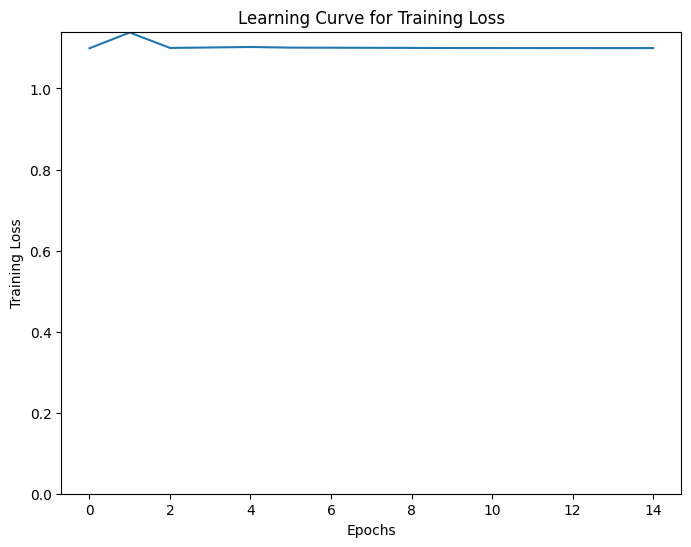

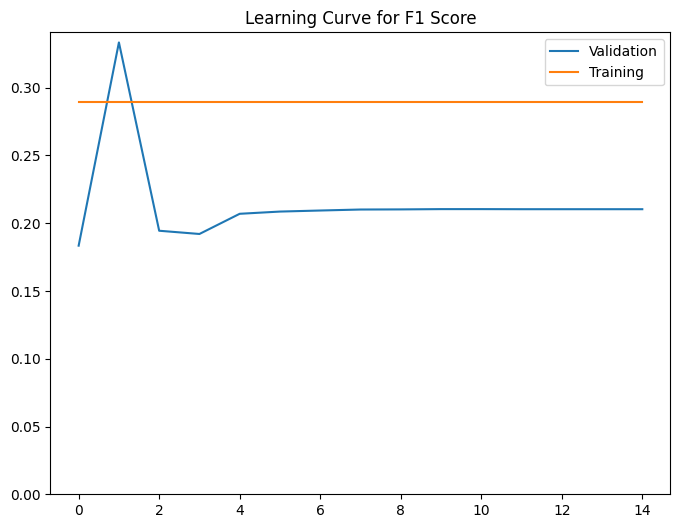

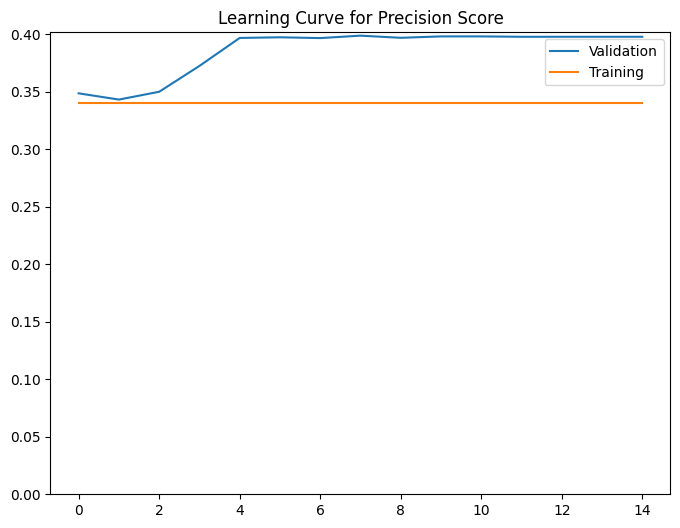

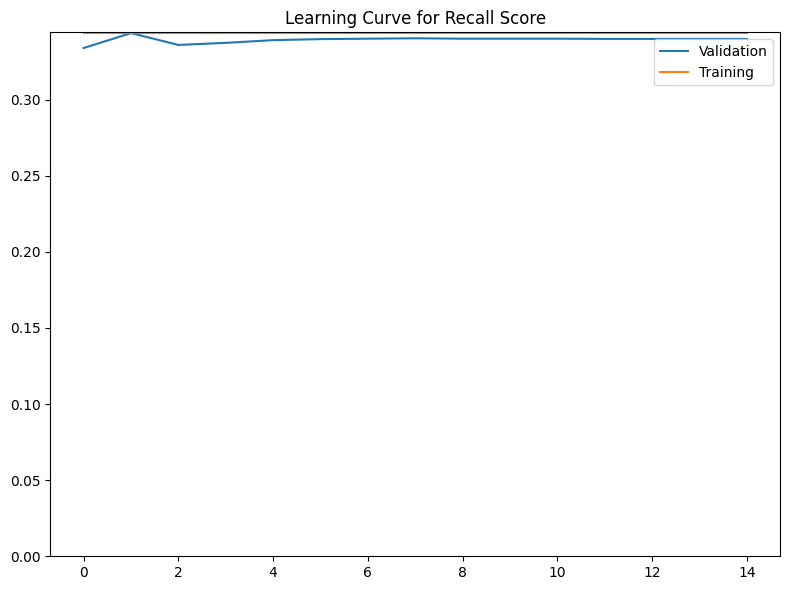

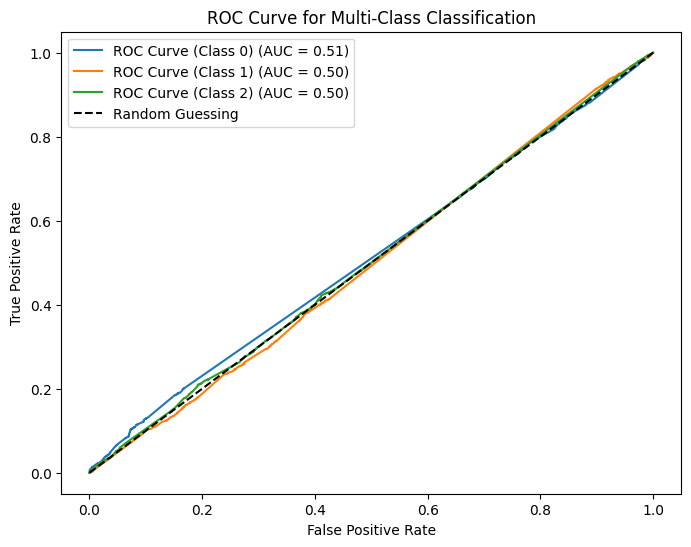

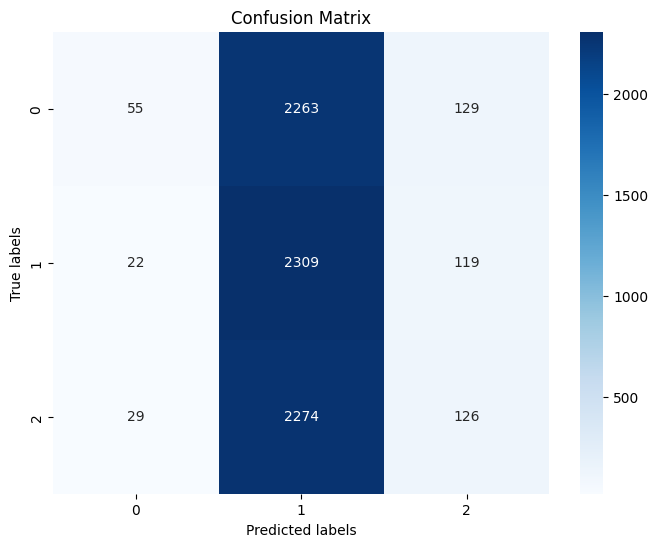

In [10]:
####################### defining best-model and applying optimization techniques #####################

from torch.optim.lr_scheduler import ReduceLROnPlateau

list_training_loss = []
list_f1 = []
list_f1_train = []
list_precision = []
list_precision_train = []
list_recall = []
list_recall_train = []


#training the final model with the best hyperparameters found during cross-validation
best_model = SentimentClassifier(input_size=100, hidden_size=best_params['hidden_size'], output_size=3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_params['lr'])

#applying optimization techniques to the final model
#initializing the learning rate scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.1, verbose=True)
best_val_loss = float('inf')
max_steps = 15 #number of consecutive epochs permitted without improvment

num_epochs = 100
for epoch in range(num_epochs):
    best_model.train()
    optimizer.zero_grad()
    y_pred = best_model(torch.stack(X_train))
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
        
    #evaluate the best model on the train set
    best_model.eval()
    with torch.no_grad():
        y_pred = model(torch.stack(X_train))
        val_loss = criterion(y_pred, y_train)
        _, predicted = torch.max(y_pred, 1)
        train_precision = precision_score(y_train, predicted, average='weighted',zero_division=0)
        train_recall = recall_score(y_train, predicted, average='weighted',zero_division=0)
        train_f1 = f1_score(y_train, predicted, average='weighted',zero_division=0)

    #evaluate the best model on the test set
    best_model.eval()
    with torch.no_grad():
        y_pred = best_model(torch.stack(X_test))
        _, predicted = torch.max(y_pred, 1)
        test_precision = precision_score(y_test, predicted, average='weighted',zero_division=0)
        test_recall = recall_score(y_test, predicted, average='weighted',zero_division=0)
        test_f1 = f1_score(y_test, predicted, average='weighted',zero_division=0)
    
    
    scheduler.step(val_loss)

    #early stopping condition
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0  #reset - improvement
    else:
        counter += 1  #increment - no improvement

    #check if training should stop based on max steps
    if counter >= max_steps:
        print("Early stopping!")
        break
            
    list_training_loss.append(loss.item())
    list_f1.append(test_f1)
    list_precision.append(test_precision)
    list_recall.append(test_recall) 
    list_f1_train.append(train_f1)
    list_precision_train.append(train_precision)
    list_recall_train.append(train_recall)
    
    
############################ Learning curve ################################## 

# Plotting training loss
plt.figure(figsize=(8, 6))
plt.plot(list_training_loss)
plt.ylim(ymin=0)
plt.title('Learning Curve for Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()


# Plotting F1 Score
plt.figure(figsize=(8, 6))
plt.plot(list_f1)
plt.plot(list_f1_train)
plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])
plt.title('Learning Curve for F1 Score')

# Plotting Precision
plt.figure(figsize=(8, 6))
plt.plot(list_precision)
plt.plot(list_precision_train)
plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])
plt.title('Learning Curve for Precision Score')

# Plotting Recall
plt.figure(figsize=(8, 6))
plt.plot(list_recall)
plt.plot(list_recall_train)
plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])
plt.title('Learning Curve for Recall Score')

plt.tight_layout()
plt.show() 

######################### ROC Curve ###########################
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = best_model(torch.stack(X_test))

for i in range(3):  # There are 3 types of Sentiments
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i].detach().numpy())
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(8, 6))
for i in range(3):  
    plt.plot(fpr[i], tpr[i], label=f'ROC Curve (Class {i}) (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend()
plt.show()

########################### Confusion matrix ################################
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = best_model(torch.stack(X_test))
_, predicted = torch.max(y_pred, 1)

cm = confusion_matrix(y_test, predicted)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [11]:
################### Train final model ###################

data_test = pd.read_csv('/kaggle/input/ys19-2023-assignment-2/test_set.csv')
pd.set_option('max_colwidth', None)
data_test.head()

#### preprocessing for test_set data
# applying all the previous steps, the same way as for train_set ###

data_test['Text'] = data_test['Text'].apply(remove_mentions_hashtags_links)
data_test['Text'] = data_test['Text'].apply(remove_stopwords)
data_test['Text'] = data_test['Text'].apply(remove_accents)
data_test['Text'] = data_test['Text'].apply(remove_punctuation)
data_test['Text'] = data_test['Text'].apply(stemming)
data_test['Text'] = data_test['Text'].str.lower()

tokenized_text = [word_tokenize(sentence.lower()) for sentence in data_test['Text']]

preprocessed_text = [" ".join(tokens) for tokens in tokenized_text]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_text)

inverse = {v: k for k, v in tfidf_vectorizer.vocabulary_.items()}
tfidf_text = [
    " ".join([inverse[word_id] for word_id in doc.indices]) 
    for doc in tfidf_matrix
]

word2vec_model = Word2Vec(sentences=tfidf_text, vector_size=100, window=5, min_count=1, workers=4)
word_embeddings = {}
for word in word2vec_model.wv.index_to_key:
    word_embeddings[word] = torch.tensor(word2vec_model.wv[word], dtype=torch.float32)

X_test = [] 
for tweet in tokenized_text:
    tweet_embeddings = [word_embeddings[word] for word in tweet if word in word_embeddings]
    if tweet_embeddings:
        X_test.append(torch.stack(tweet_embeddings).mean(0)) 
    else:
        X_test.append(torch.zeros(100))

    
best_model.eval()
with torch.no_grad():
    y_pred = best_model(torch.stack(X_test))
    _, predicted = torch.max(y_pred, 1)

# Inverse convertion of the numeric predictions back to original labels
predicted_labels = label_encoder.inverse_transform(predicted)

data_test['Predicted'] = predicted_labels

# Removing Text and Party columns and then rename New_ID to Id
data_test.drop(['Text', 'Party'], axis=1, inplace=True)
data_test.rename(columns={'New_ID': 'Id'}, inplace=True)

# Final submission
print(data_test)
data_test.to_csv('submission.csv', index=False)

          Id Predicted
0          1   NEUTRAL
1          2   NEUTRAL
2          3   NEUTRAL
3          4   NEUTRAL
4          5   NEUTRAL
...      ...       ...
10465  10466   NEUTRAL
10466  10467   NEUTRAL
10467  10468   NEUTRAL
10468  10469   NEUTRAL
10469  10470   NEUTRAL

[10470 rows x 2 columns]
